# Load Data

In [1]:
import yt
import numpy as np

In [2]:
ds=yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2022-03-30 11:44:56,336 Sample dataset found in '/Users/yilinxia/Desktop/DXL/yt/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-03-30 11:44:56,481 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-03-30 11:44:56,483 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-03-30 11:44:56,486 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-30 11:44:56,489 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-30 11:44:56,490 Parameters: cosmological_simulation   = 0


In [3]:
ds

EnzoDataset: /Users/yilinxia/Desktop/DXL/yt/IsolatedGalaxy/galaxy0030/galaxy0030

# Mesh Structure

### General Overview

In [4]:
ds.print_stats()

Parsing Hierarchy : 100%|██████████████████████████| 173/173 [00:00<00:00, 3682.80it/s]
yt : [INFO     ] 2022-03-30 11:44:56,624 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


In [5]:
len(ds.index.grids)

173

In [6]:
ds.index.grids[0]

EnzoGrid_0001

In [7]:
ds.index.grids[172]

EnzoGrid_0173

In [8]:
len(ds.index.grid_left_edge)

173

In [9]:
len(ds.index.grid_right_edge)

173

In [10]:
ds.index.comm

In [11]:
ds.index.max_level

8

### Individual Grid

```
Grid = 1
Task              = 0
GridRank          = 3
GridDimension     = 38 38 38 
GridStartIndex    = 3 3 3 
GridEndIndex      = 34 34 34 
GridLeftEdge      = 0 0 0 
GridRightEdge     = 1 1 1 
Time              = 0.0060000200028298
SubgridsAreStatic = 0
NumberOfBaryonFields = 24
FieldType = 0 4 5 6 1 49 50 51 52 53 7 8 9 10 11 12 23 24 25 27 19 61 62 83 
BaryonFileName = ./DD0030/galaxy0030.cpu0000
CourantSafetyNumber    = 0.300000
PPMFlatteningParameter = 0
PPMDiffusionParameter  = 0
PPMSteepeningParameter = 0
NumberOfParticles   = 0
GravityBoundaryType = 1
Pointer: Grid[1]->NextGridThisLevel = 0
Pointer: Grid[1]->NextGridNextLevel = 2
```

In [12]:
g0=ds.index.grids[0]

In [13]:
g0

EnzoGrid_0001

In [14]:
g0.get_global_startindex()

array([0, 0, 0])

In [15]:
g0.ActiveDimensions   # GridEndIndex - GridStartIndex

array([32, 32, 32], dtype=int32)

In [16]:
g0.LeftEdge

unyt_array([0., 0., 0.], 'code_length')

In [17]:
g0.RightEdge

unyt_array([1., 1., 1.], 'code_length')

In [18]:
g0.Level

0

In [19]:
g0.Children

[EnzoGrid_0002,
 EnzoGrid_0003,
 EnzoGrid_0004,
 EnzoGrid_0005,
 EnzoGrid_0006,
 EnzoGrid_0007,
 EnzoGrid_0008,
 EnzoGrid_0009]

In [20]:
ds.index.grids[1].get_global_startindex()

array([16, 14, 16])

In [41]:
g9=ds.index.grids[9]
g9.Level

2

In [45]:
g18=ds.index.grids[18]
g18.Level
g18

EnzoGrid_0019

In [49]:
ds=yt.load_sample("IsolatedGalaxy")
level_ls=[]
for i in range(len(ds.index.grids)):
    level_ls.append(ds.index.grids[i].Level)
len(level_ls)

yt : [INFO     ] 2022-03-30 11:50:50,524 Sample dataset found in '/Users/yilinxia/Desktop/DXL/yt/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-03-30 11:50:50,674 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-03-30 11:50:50,678 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-03-30 11:50:50,680 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-30 11:50:50,682 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-30 11:50:50,683 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████████████| 173/173 [00:00<00:00, 9042.38it/s]
yt : [INFO     ] 2022-03-30 11:50:50,720 Gathering a field list (this may take a moment.)


173

# Advanced Grid Inspection

In [21]:
gs=ds.index.select_grids(ds.index.max_level)
len(gs)

36

In [22]:
g2=gs[0]

In [23]:
print(g2)

EnzoGrid_0028


```
Grid = 28
Task              = 5
GridRank          = 3
GridDimension     = 44 40 32 
GridStartIndex    = 3 3 3 
GridEndIndex      = 40 36 28 
GridLeftEdge      = 0.5 0.5 0.5 
GridRightEdge     = 0.504638671875 0.504150390625 0.503173828125 
Time              = 0.0060000200028298
SubgridsAreStatic = 0
NumberOfBaryonFields = 24
FieldType = 0 4 5 6 1 49 50 51 52 53 7 8 9 10 11 12 23 24 25 27 19 61 62 83 
BaryonFileName = ./DD0030/galaxy0030.cpu0005
CourantSafetyNumber    = 0.300000
PPMFlatteningParameter = 0
PPMDiffusionParameter  = 0
PPMSteepeningParameter = 0
NumberOfParticles   = 43926
ParticleFileName = ./DD0030/galaxy0030.cpu0005
GravityBoundaryType = 2
Pointer: Grid[28]->NextGridThisLevel = 0
Pointer: Grid[28]->NextGridNextLevel = 0
Pointer: Grid[8]->NextGridNextLevel = 29
```

In [24]:
print(g2.Parent)

EnzoGrid_0023


In [25]:
# ds.index.grids[22]

In [26]:
g2.get_global_startindex()

array([4096, 4096, 4096])

In [27]:
g2["density"].shape

(38, 34, 26)

In [28]:
g2.Parent.child_mask.shape

(40, 42, 24)

In [29]:
g2.ActiveDimensions.prod()

33592

# Simple Visualization

In [30]:
p=yt.ProjectionPlot(ds,"y",("gas","density"))

yt : [INFO     ] 2022-03-30 11:44:59,694 Projection completed
yt : [INFO     ] 2022-03-30 11:44:59,695 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-30 11:44:59,696 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-30 11:44:59,697 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-30 11:44:59,698 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-30 11:44:59,701 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



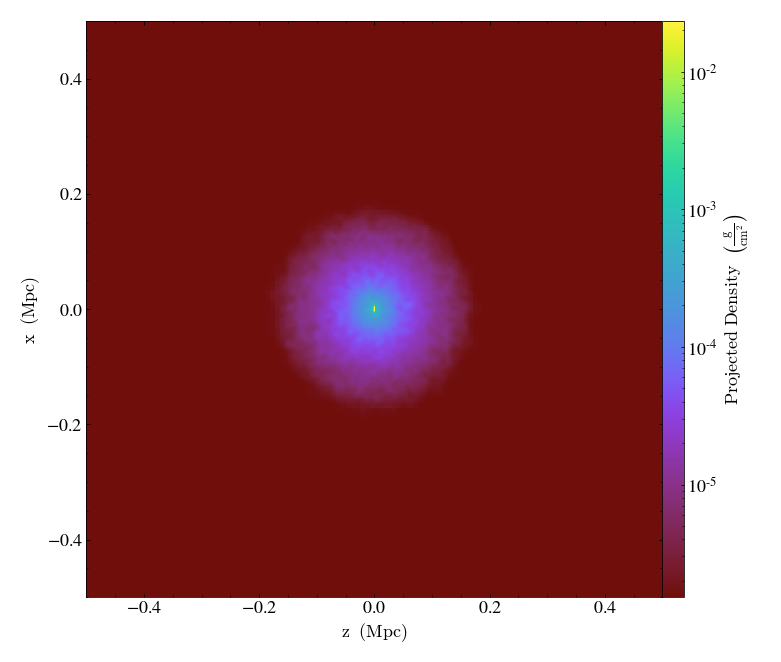

In [31]:
p.show()

# hexahedral_connectivity

In [32]:
xgrid = np.array([-1, -0.25, 0])

In [33]:
coords, conn = yt.hexahedral_connectivity(xgrid, xgrid, xgrid)

In [34]:
coords

array([[-1.  , -1.  , -1.  ],
       [-1.  , -1.  , -0.25],
       [-1.  , -1.  ,  0.  ],
       [-1.  , -0.25, -1.  ],
       [-1.  , -0.25, -0.25],
       [-1.  , -0.25,  0.  ],
       [-1.  ,  0.  , -1.  ],
       [-1.  ,  0.  , -0.25],
       [-1.  ,  0.  ,  0.  ],
       [-0.25, -1.  , -1.  ],
       [-0.25, -1.  , -0.25],
       [-0.25, -1.  ,  0.  ],
       [-0.25, -0.25, -1.  ],
       [-0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.  ],
       [-0.25,  0.  , -1.  ],
       [-0.25,  0.  , -0.25],
       [-0.25,  0.  ,  0.  ],
       [ 0.  , -1.  , -1.  ],
       [ 0.  , -1.  , -0.25],
       [ 0.  , -1.  ,  0.  ],
       [ 0.  , -0.25, -1.  ],
       [ 0.  , -0.25, -0.25],
       [ 0.  , -0.25,  0.  ],
       [ 0.  ,  0.  , -1.  ],
       [ 0.  ,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.  ]])

In [35]:
conn

array([[ 0,  1,  3,  4,  9, 10, 12, 13],
       [ 1,  2,  4,  5, 10, 11, 13, 14],
       [ 3,  4,  6,  7, 12, 13, 15, 16],
       [ 4,  5,  7,  8, 13, 14, 16, 17],
       [ 9, 10, 12, 13, 18, 19, 21, 22],
       [10, 11, 13, 14, 19, 20, 22, 23],
       [12, 13, 15, 16, 21, 22, 24, 25],
       [13, 14, 16, 17, 22, 23, 25, 26]])